In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats

warnings.filterwarnings('ignore')


In [36]:
#Create database Connection
conn = sqlite3.connect('inventory.db')

#Fetching vendor summary data
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,1584606.40,9578.0,344712.22,64889.97,17598.14,68601.68,-1239894.18,-359.689651
1,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,1553500.41,20226.0,444810.74,43304.31,37163.76,257032.07,-1108689.67,-249.249753
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,1446708.15,9203.0,275162.97,52289.50,16909.12,144929.24,-1171545.18,-425.764114
3,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,1375022.40,11189.0,288135.11,48202.30,20557.97,123780.22,-1086887.29,-377.214457
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,1286759.87,11883.0,357759.17,52774.51,21833.58,257032.07,-929000.70,-259.672086


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8512.0,1.015346e+04,17718.122212,2.00,3664.000000,7153.000000,9552.000000,1.733570e+05
Brand,8512.0,1.760026e+04,13004.702546,58.00,5297.750000,17432.500000,24988.000000,9.063100e+04
PurchasePrice,8512.0,2.188977e+01,105.829821,0.36,6.800000,10.270000,18.240000,5.681810e+03
ActualPrice,8512.0,3.218842e+01,144.210224,0.49,10.990000,15.990000,26.990000,7.499990e+03
Volume,8512.0,8.548756e+02,617.982459,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseDollars,8512.0,1.578656e+04,56938.194190,0.71,344.880000,2840.535000,12601.875000,1.584606e+06
TotalSalesQuantity,8512.0,2.872162e+02,967.741069,0.00,3.000000,34.000000,200.000000,2.854400e+04
TotalSalesDollars,8512.0,3.873112e+03,13541.331564,0.00,59.940000,649.745000,3129.827500,4.448107e+05
TotalSalesPrice,8512.0,1.890345e+03,4290.868376,0.00,22.692500,363.675000,1831.792500,6.488997e+04
TotalExciseTax,8512.0,1.632617e+02,947.469977,0.00,0.340000,5.830000,48.122500,3.716376e+04


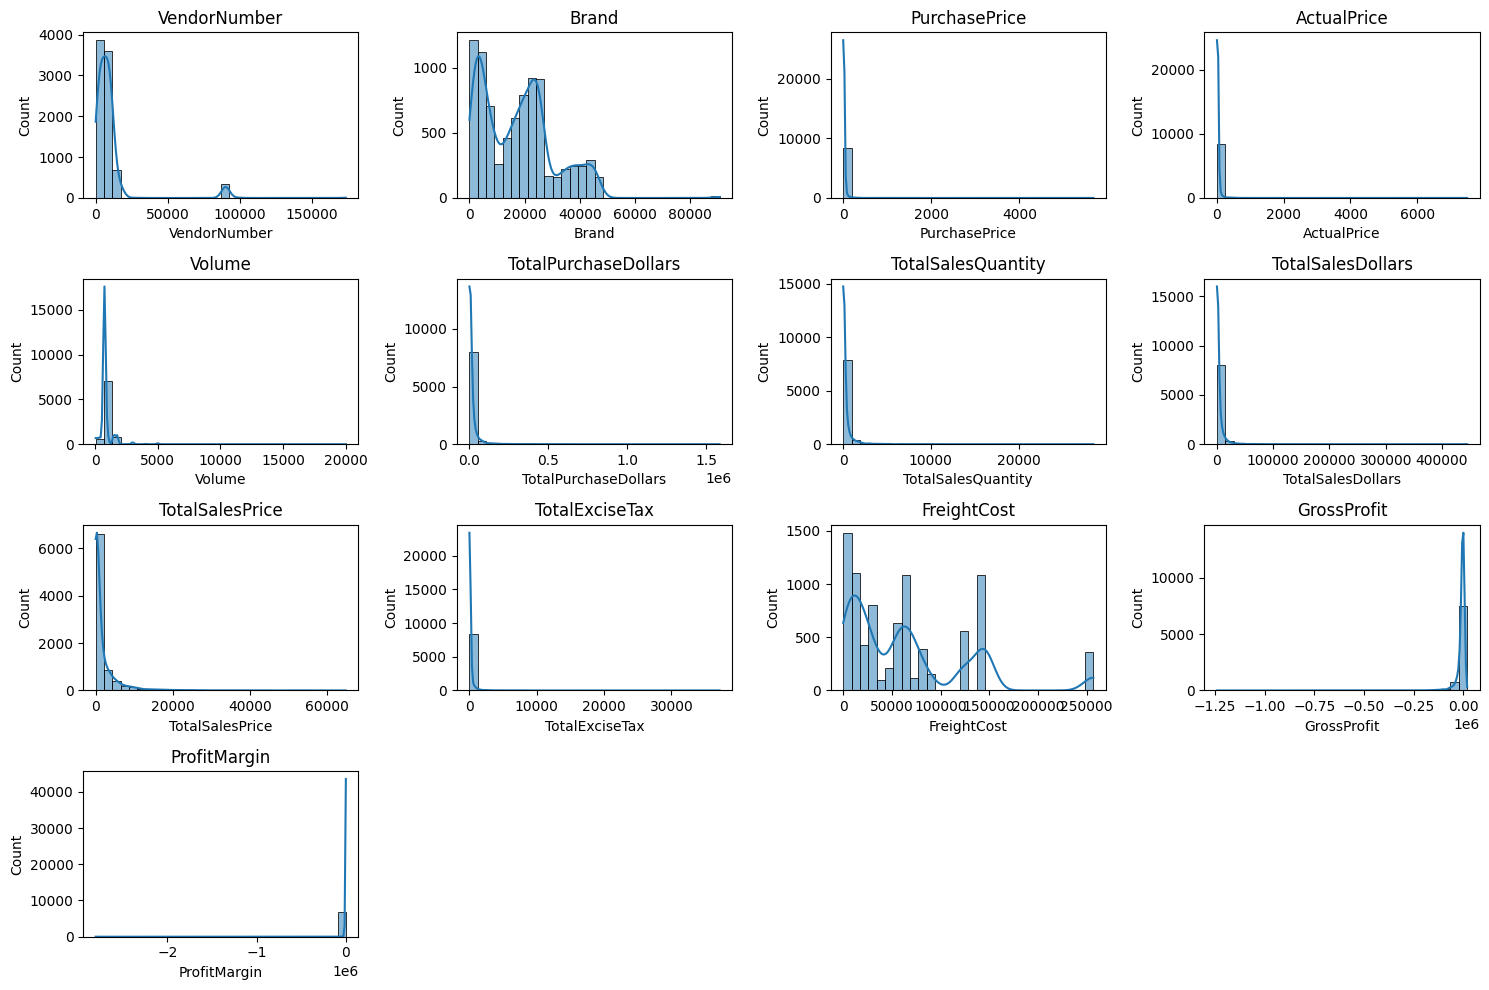

In [15]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)    #Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

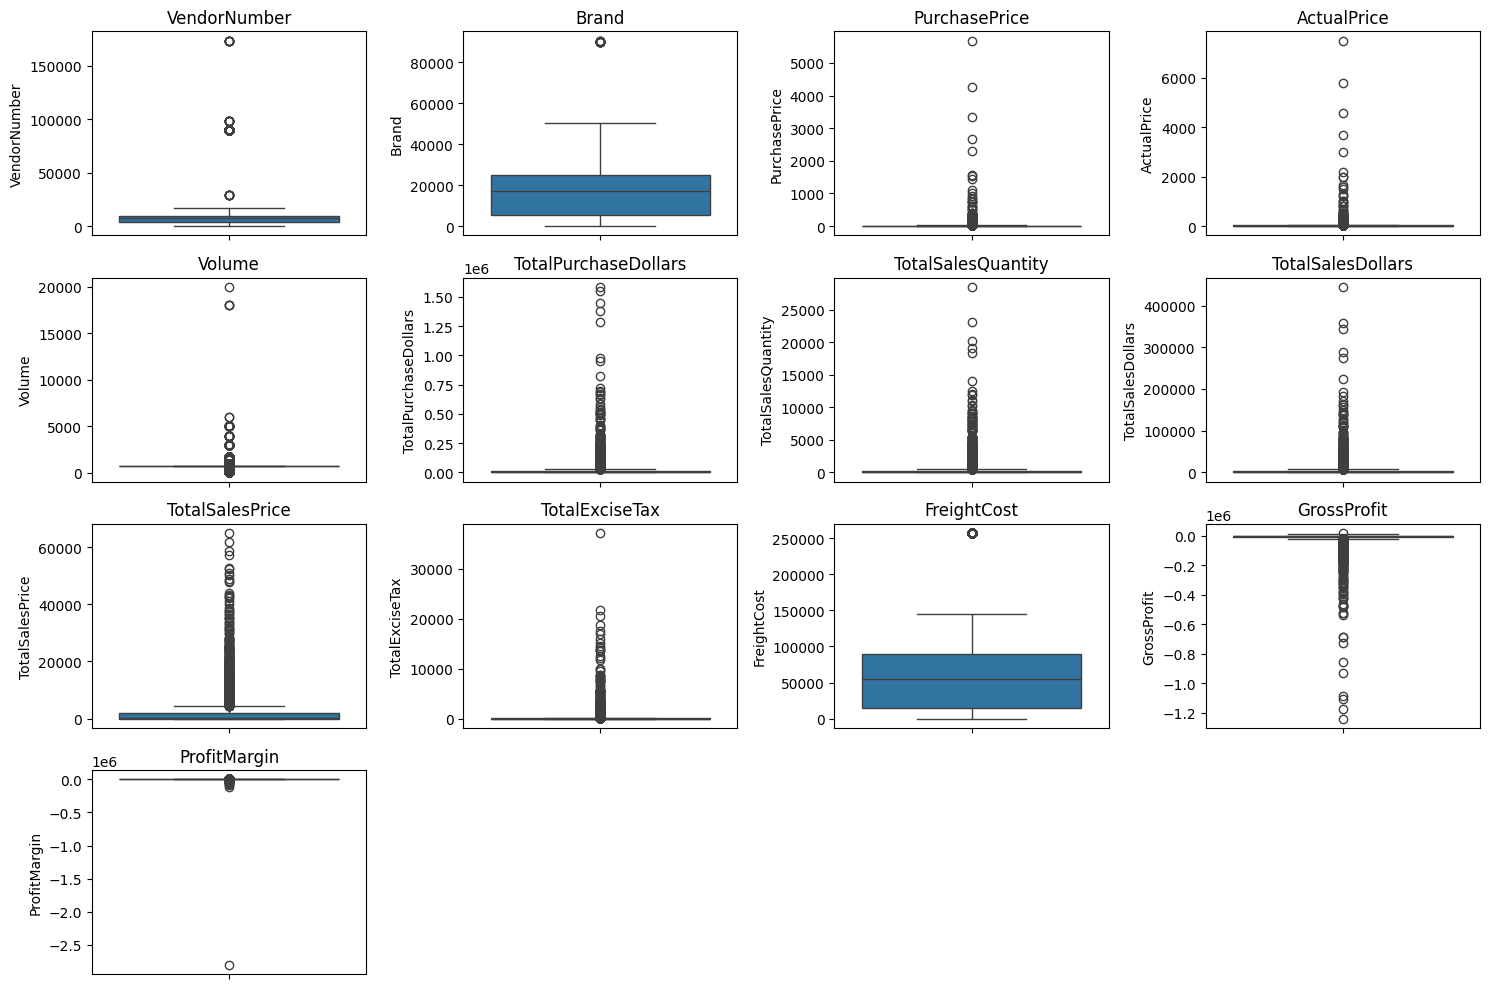

In [16]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) 
    sns.boxplot(y = df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [17]:
# let's filter the data by removing inconsistencies

df = pd.read_sql_query("""SELECT * 
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0 
AND TotalSalesQuantity > 0 """, conn)

In [18]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin
0,1392,CONSTELLATION BRANDS INC,6650,Simi Chard,7.38,14.99,750.0,82648.62,8458.0,93369.42,13558.87,949.79,79528.99,10720.80,11.482132
1,1392,CONSTELLATION BRANDS INC,22143,Simi Cab Svgn,10.52,18.99,750.0,44120.88,2887.0,46523.13,13703.56,323.21,79528.99,2402.25,5.163561
2,516,BANFI PRODUCTS CORP,18152,Banfi Centine Mntcln Tscna,5.26,10.99,750.0,30102.98,3891.0,31728.09,7605.68,436.17,8510.41,1625.11,5.121991
3,10754,PERFECTA WINES,25197,Ch La Rousseliere St Estephe,99.33,149.99,750.0,24733.17,198.0,29698.02,1199.92,22.24,28720.52,4964.85,16.717781
4,4425,MARTIGNETTI COMPANIES,8781,Rodney Strong Cab Svgn,10.32,15.99,750.0,23127.12,1840.0,31245.60,11934.97,205.53,144929.24,8118.48,25.982794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,90024,VINILANDIA USA,46135,Aresti Pnt Nr Curico Vly,3.28,10.99,750.0,3.28,15.0,74.85,39.92,1.68,2802.64,71.57,95.617902
978,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2.64,3.0,5.97,5.97,0.33,27100.41,3.33,55.778894
979,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,2.34,128.0,62.72,0.98,6.72,50293.62,60.38,96.269133
980,9815,WINE GROUP INC,22407,Three Wishes Chard,2.25,3.29,750.0,2.25,1.0,3.29,3.29,0.11,27100.41,1.04,31.610942


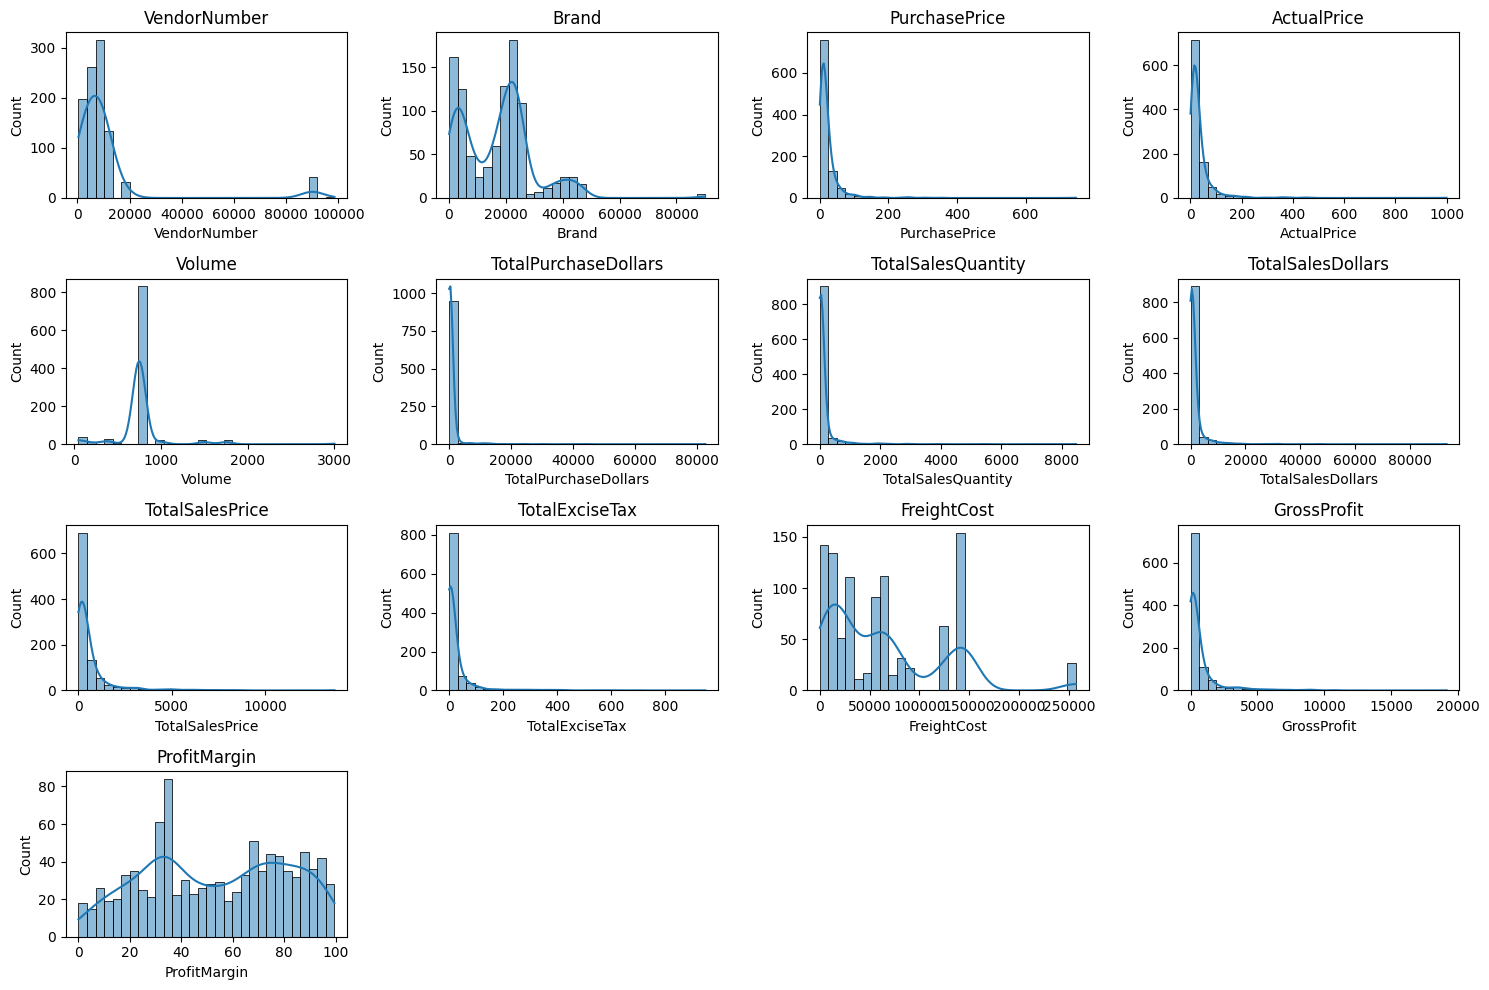

In [19]:

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)    #Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

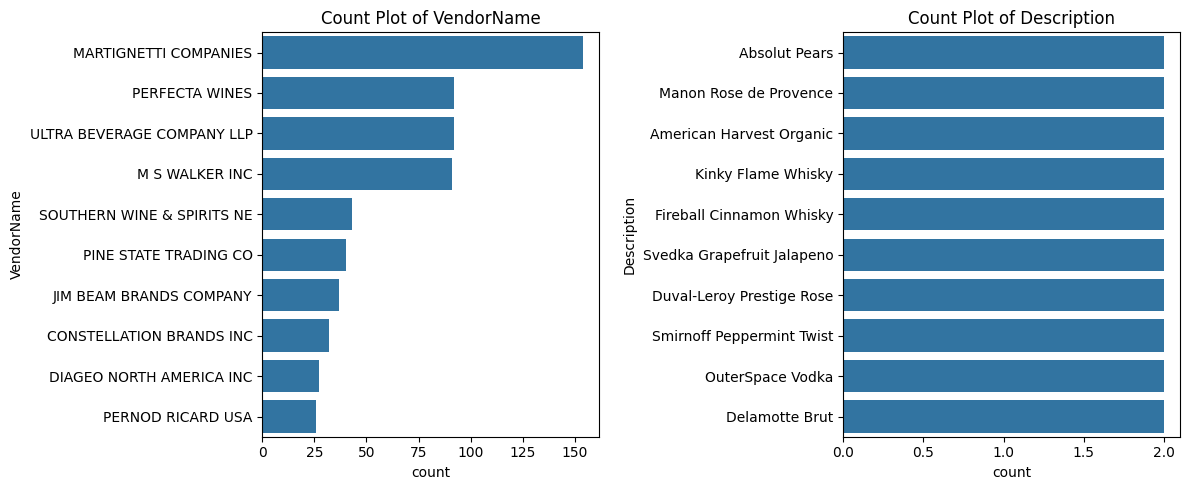

In [20]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName","Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])      #Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

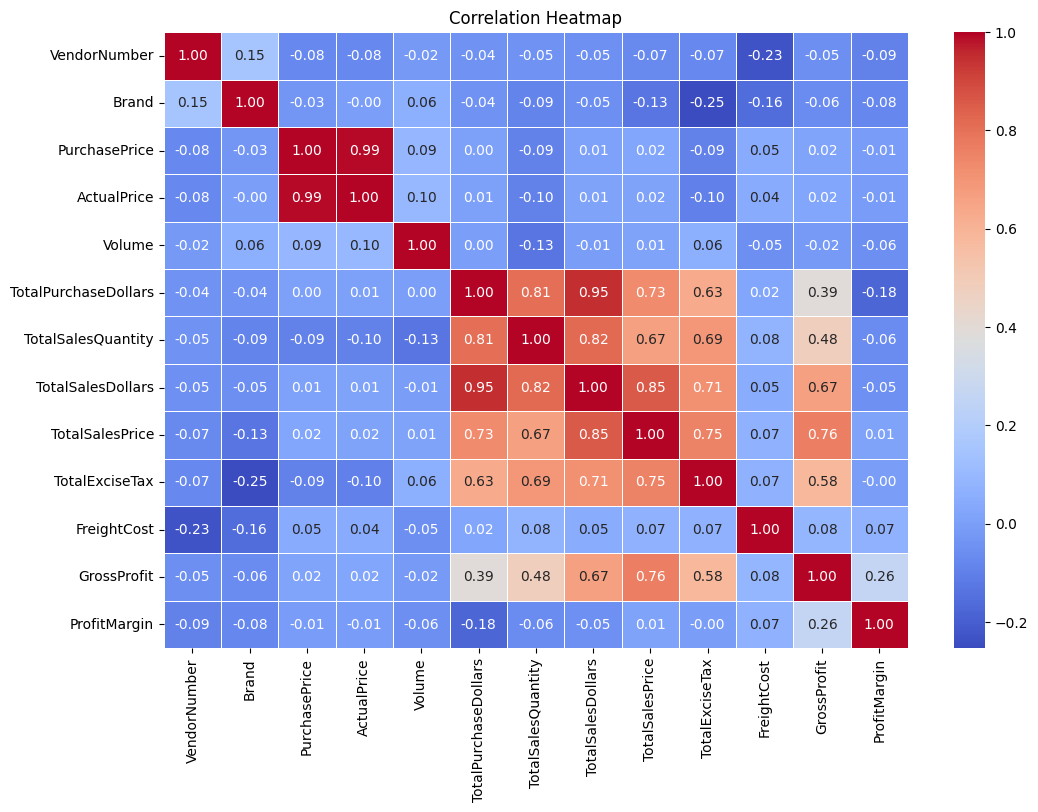

In [21]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [22]:
brand_performance = df.groupby("Description").agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin':'mean'}).reset_index()

In [23]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)


In [24]:
low_sales_threshold

np.float64(117.98)

In [25]:
high_margin_threshold

np.float64(86.42455041969913)

In [26]:
# Filter brands with low sales but high profit margines

target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
915,Tracia Syrah,44.94,88.495772
64,Bacardi Oakheart Spiced Trav,59.94,87.554221
272,Chicken & Turkey Cotes du Rh,59.94,90.990991
349,Dr McGillicuddy's Apple Pie,62.72,96.269133
837,St Elder Elderflower Liqueur,66.33,91.436756
46,Aresti Pnt Nr Curico Vly,74.85,95.617902
324,DeKuyper Buttershots Trav,76.93,90.718835
900,Three Olives Grape Vodka,80.19,99.114603
838,St Germain Liqueur,89.94,87.658439
699,Piehole Apple Pie,98.01,95.592287


In [27]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000]

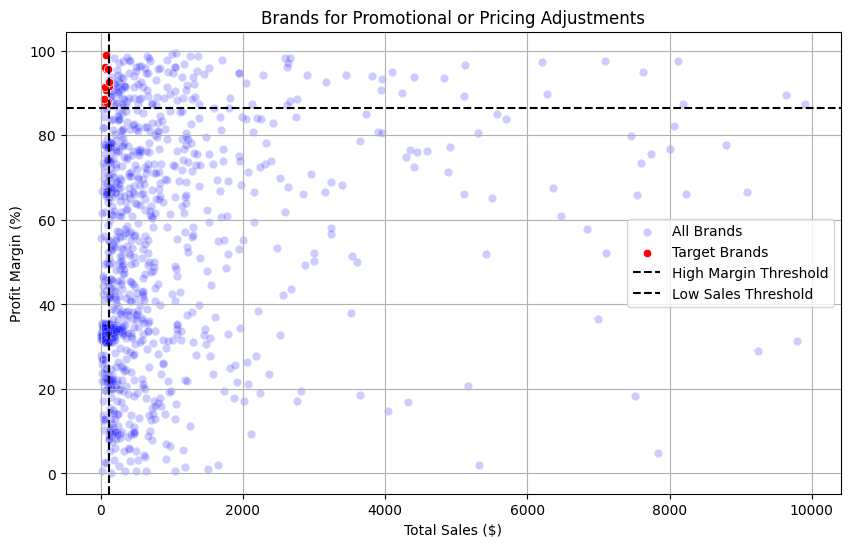

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x ='TotalSalesDollars', y = 'ProfitMargin', color="blue", label="All Brands", alpha= 0.2)
sns.scatterplot(data=target_brands, x ='TotalSalesDollars', y = 'ProfitMargin', color="red", label="Target Brands")
plt.axhline(high_margin_threshold, linestyle ='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle ='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K" 
    else:
        return str(value)

In [30]:
top_brands.apply(lambda x : format_dollars(x))

NameError: name 'top_brands' is not defined

In [ ]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

In [ ]:
top_brands

In [ ]:
plt.figure(figsize=(15,5))
#Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02), 
             bar.get_y() + bar.get_height() / 2, 
             format_dollars(bar.get_width()), 
             ha='left', va='center', fontsize=10, color='black')

#Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette ="Greens_r")
plt.title("Top 10 Brands by Sales")
for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02), 
         bar.get_y() + bar.get_height() / 2, 
         format_dollars(bar.get_width()), 
         ha='left', va='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()

# Ehich vendors contibute the most to total purchase dollars?

In [ ]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [ ]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/ vendor_performance['TotalPurchaseDollars'].sum()*100

In [ ]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending =False),2)

In [ ]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors


In [ ]:
top_vendors['PurchaseContribution%'].sum()

In [ ]:
top_vendors['Cumulative_contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

In [ ]:
# --- 1️⃣ Sort and keep only Top 10 Vendors ---
top_vendors_sorted = (
    top_vendors.sort_values(by='PurchaseContribution%', ascending=False)
    .head(10)
    .reset_index(drop=True)
)

# --- 2️⃣ Calculate cumulative contribution percentage ---
top_vendors_sorted['Cumulative_Contribution%'] = (
    top_vendors_sorted['PurchaseContribution%'].cumsum().clip(upper=100)
)

# --- 3️⃣ Plot Setup ---
fig, ax1 = plt.subplots(figsize=(12, 7))
sns.set_style("whitegrid")

# --- 4️⃣ Bar Plot (Purchase Contribution %) ---
sns.barplot(
    x='VendorName',
    y='PurchaseContribution%',
    data=top_vendors_sorted,
    palette='mako',
    ax=ax1
)

# Add % labels above each bar
for i, value in enumerate(top_vendors_sorted['PurchaseContribution%']):
    ax1.text(i, value + 0.5, f'{value:.1f}%', ha='center', fontsize=10, color='black')

# --- 5️⃣ Line Plot (Cumulative Contribution %) ---
ax2 = ax1.twinx()
ax2.plot(
    top_vendors_sorted['VendorName'],
    top_vendors_sorted['Cumulative_Contribution%'],
    color='red',
    marker='o',
    linewidth=2,
    label='Cumulative Contribution %'
)

# --- 6️⃣ Formatting ---
ax1.set_xticklabels(top_vendors_sorted['VendorName'], rotation=45, ha='right')
ax1.set_xlabel('Top 10 Vendors', fontsize=12)
ax1.set_ylabel('Purchase Contribution %', color='blue', fontsize=12)
ax2.set_ylabel('Cumulative Contribution %', color='red', fontsize=12)
ax1.set_title('Pareto Chart: Top 10 Vendor Purchase Contributions', fontsize=14, fontweight='bold')

# --- 7️⃣ Reference Line + Legend ---
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


# How much of total procurement is dependent on the top vendors?

In [ ]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

In [ ]:

# --- 1️⃣ Prepare Data ---
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)

# Ensure total = 100% by adding "Other Vendors"
total_contribution = sum(purchase_contributions)
remaining_contribution = max(0, 100 - total_contribution)  # Prevent negatives
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# --- 2️⃣ Create Donut Chart ---
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# --- 3️⃣ Draw white circle in center for donut look ---
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# --- 4️⃣ Add Total Contribution text in center ---
plt.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

# --- 5️⃣ Add title and show chart ---
plt.title("Top 10 Vendors' Purchase Contribution (%)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [45]:
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary",conn)
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

KeyError: 'TotalPurchaseQuantity'

In [ ]:
df['OrderSize'] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small","Medium","Large"])

In [ ]:
df.groupby('OrderSize')['UnitPurchasePrice'].mean()


In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")

plt.title("Impact of Bulk Purchasing on Unit Price", fontsize=14, fontweight='bold')
plt.xlabel("Order Size", fontsize=12)
plt.ylabel("Average Unit Purchase Price", fontsize=12)

plt.tight_layout()
plt.show()


# Whitch vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [37]:
df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean().sort_values("StockTurnover",ascending = True).head(10)

KeyError: 'StockTurnover'

In [40]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))

SyntaxError: unmatched ')' (3108060808.py, line 1)

In [41]:
#Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName") ["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

KeyError: 'Column not found: UnsoldInventoryValue'

In [43]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

top_vendors

NameError: name 'top_threshold' is not defined

In [50]:
def confidence_interval(data, cohfidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Standard error
    t_critical = stats.t.ppf((l + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

In [53]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)
print(f"Top Vendors 95% CI: ((top_lower:.2f>, (top_upper:.2f>), Mean: (top_mean:.2f)")
print(f"Low Vendors 95% CI: (flow_lower:.2f>, (low_upper:.2f>), Mean: (low_mean:.2f)")
plt.figure(figsize=(12, 6))
# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: <top_lower:.2f)")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: (top_upper:.2f)")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: (top_mean:.2f)")
# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: flow_lower:.2f)")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: <low_upper:.2f)")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: (low_mean:.2f)")
# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'top_vendors' is not defined

In [54]:
top_threshold = df["TotalSalesDollars").quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)
top_vendors = df[df["TotalSalesDollars"] >= top_threshold] ["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()
# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)
# Print results
print(f"T-Statistic: (t_stat:.4f>, P-yalue: (p_value:.4f)")
if p_value < 0.05:
print("Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.")
else:
print("Fail to Reject Ho: No significant difference in profit margins.")
T-Statistic: -17.6440, P-Value: 0.0000
Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (2682645744.py, line 1)